In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the dataset

In [3]:
file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path)

### Display first few rows

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Summary of dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### Checking for Missing Values

In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### Distribution of Movies vs TV Shows

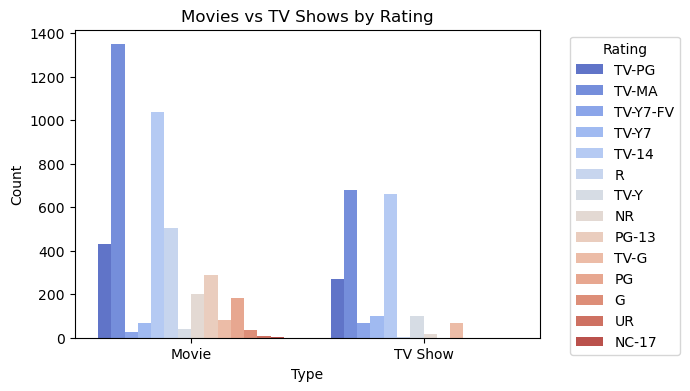

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='coolwarm', hue='rating')
plt.title('Movies vs TV Shows by Rating')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Top 10 Years with Most Content

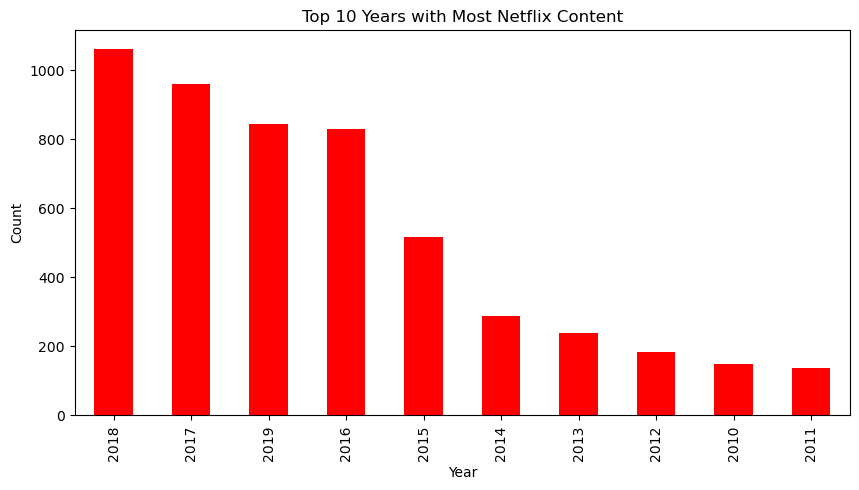

In [37]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().head(10).plot(kind='bar', color='Red')
plt.title('Top 10 Years with Most Netflix Content')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Top 10 Countries with Most Content

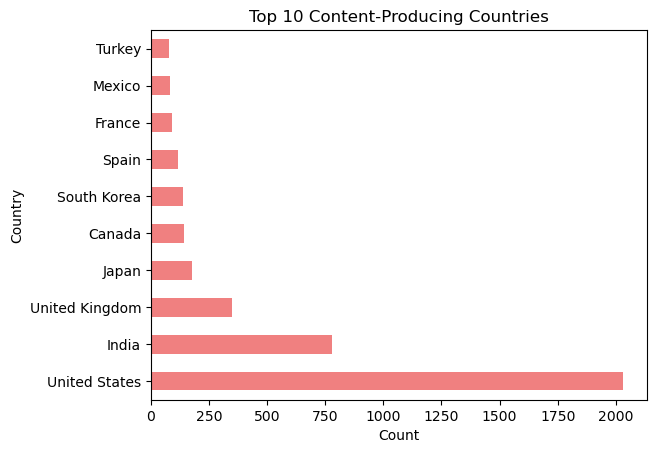

In [53]:
df['country'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### Rating distribution

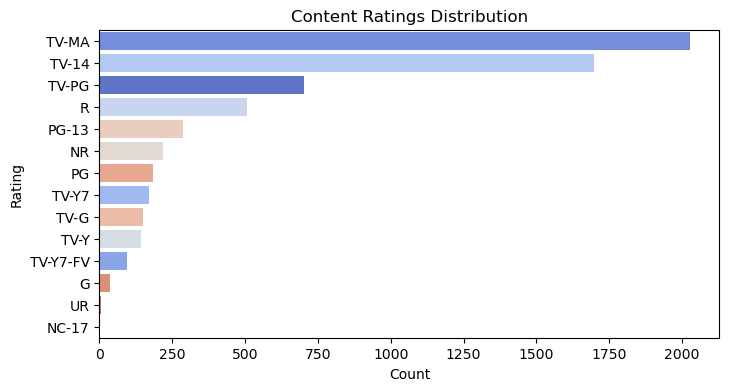

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, hue=df['rating'], palette='coolwarm', legend=False)
plt.title('Content Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

### Top 10 Directors with Most Content

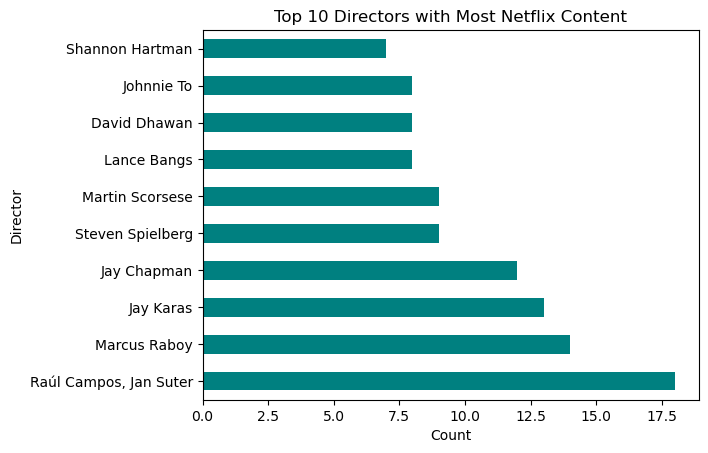

In [63]:
df['director'].dropna().value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Directors with Most Netflix Content')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

### Monthly Content Additions

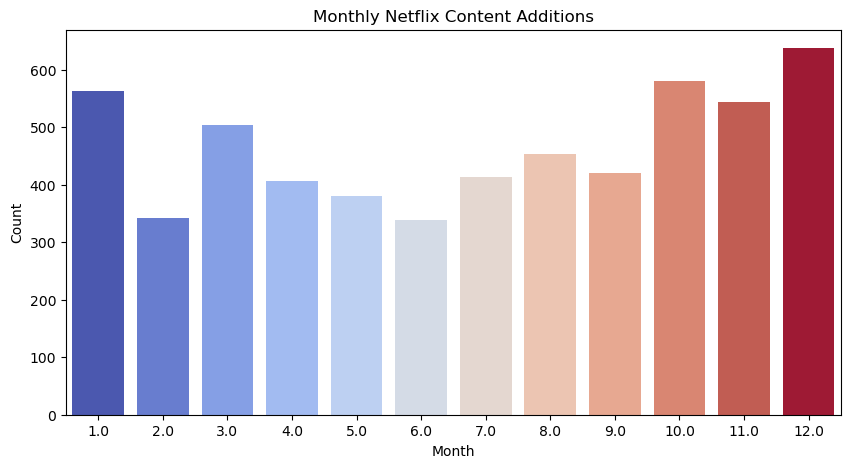

In [70]:
# Monthly Content Additions
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x=df['month_added'], hue=df['month_added'], palette='coolwarm', legend=False)
plt.title('Monthly Netflix Content Additions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Conclusion 

- Netflix has significantly more movies than TV shows.
- The majority of content has been released in recent years, indicating a growing catalog.
- The USA, India, and the UK are the top content-producing countries.
- Most content is rated TV-MA, suggesting a focus on mature audiences.
- The busiest months for content additions are mostly towards the end of the year.